# Exercise 3 - Geospatial data

In this exercise geospatial data will be visualized on a [cartopy](https://scitools.org.uk/cartopy/docs/latest/#) map. 
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. Cartopy has built an interface to work with matplotlib. In principal a matplotlib figure will be given a new coordinate system, which enables you to plot geospatial data on top of it.

In [8]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
from cartopy.feature import ShapelyFeature

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm

# Set standard size for figures
plt.rcParams["figure.figsize"]=20,7


## Creating  a map 
In this first example we will create a matplotlib figure with a certain axes and a projection (PlateCarree). [Here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#cartopy-projections) is a list of other projections that are available. The different projections all have arguments that can be used to change the settings of your projection. For example, with central_longitude and central_latitude you can change the center of the projected map. To give an idea of the world projection, we will use the [stock_img()](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img) function to add a standard image to the map.

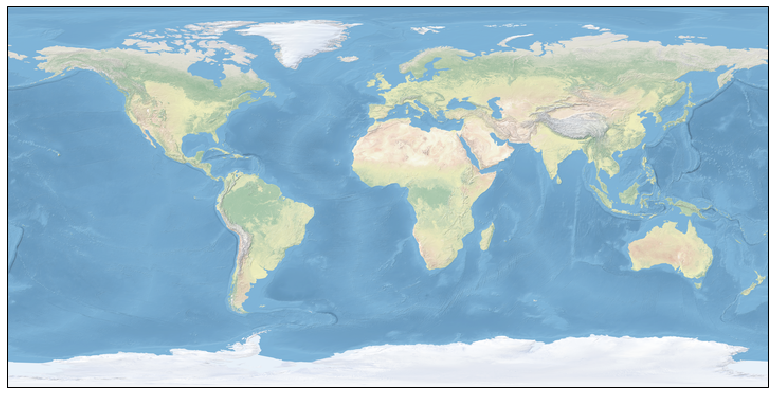

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.stock_img();

Th

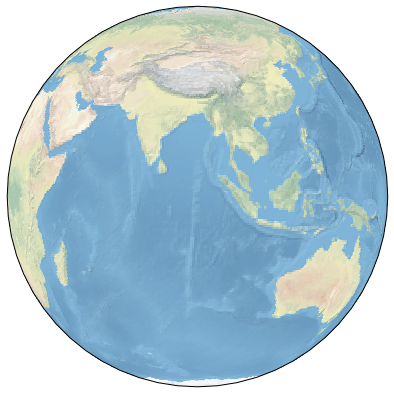

In [10]:
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=90))
ax.stock_img()

In [4]:
shpfilename = r'../data/deelstroomgebieden/deelstroomgebieden_v.shp'
reader = shpreader.Reader(shpfilename)
shape_feature = ShapelyFeature(reader.geometries(), ccrs.epsg(28992))

C:\Users\vries_cy\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\feature_artist.py:163: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


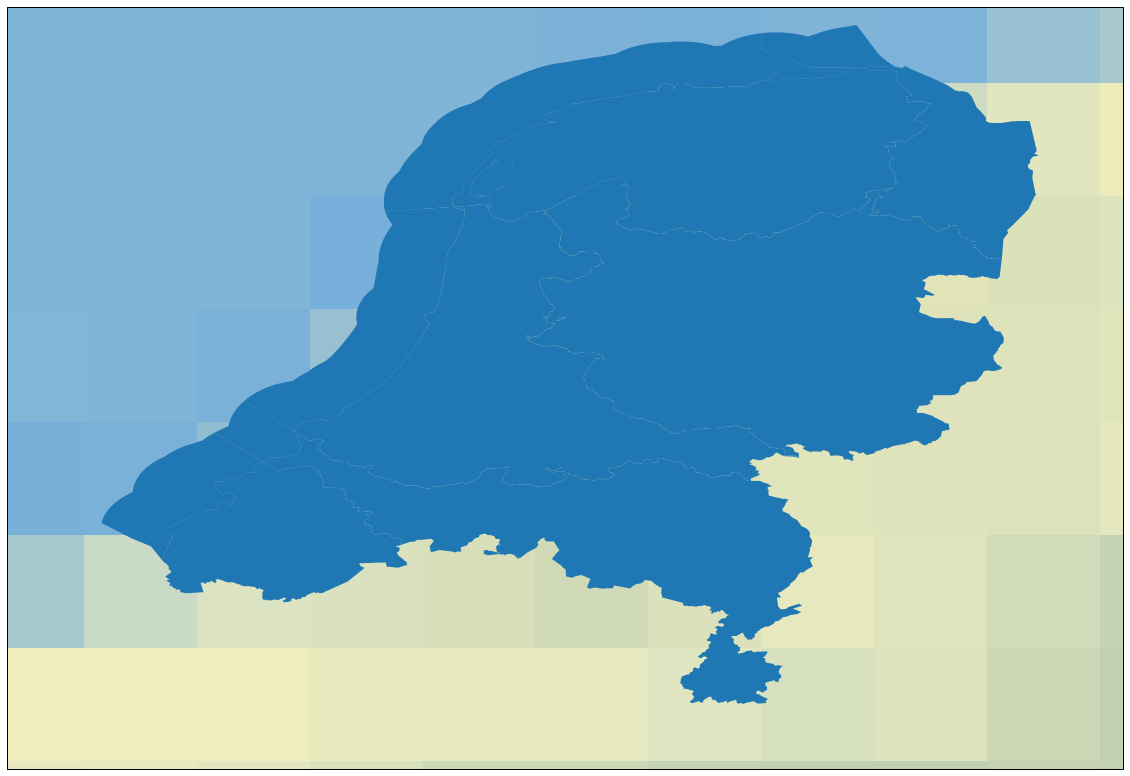

In [5]:
extent = [2.658691, 7.602539, 50.464498, 53.839564]

plt.rcParams["figure.figsize"]=20,20
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([2.658691, 7.602539, 50.464498, 53.839564])
ax.stock_img();
ax.add_feature(shape_feature)

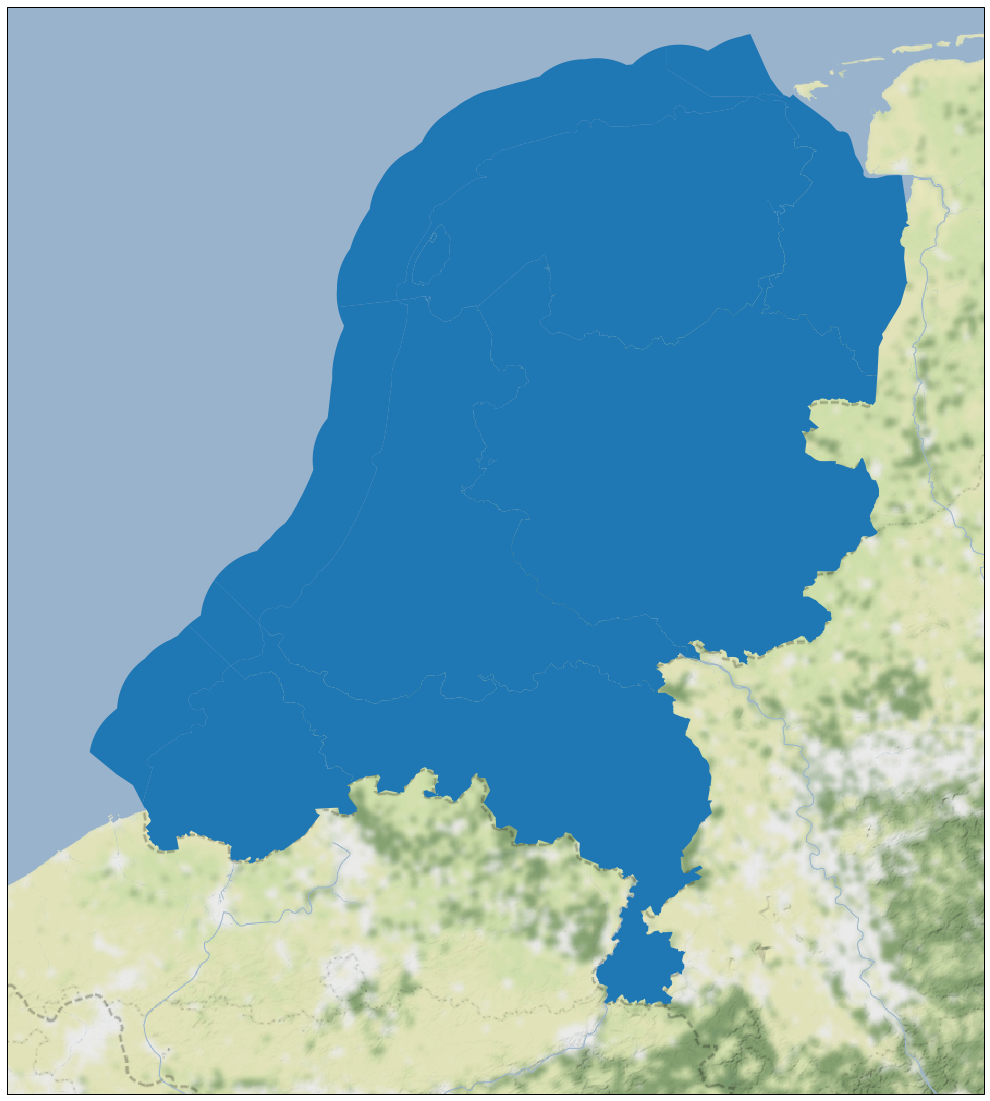

In [6]:
stamen_terrain = cimgt.Stamen('terrain-background')

ax = plt.axes(projection=stamen_terrain.crs)
ax.set_extent(extent, crs=ccrs.Geodetic())
ax.add_image(stamen_terrain, 8)

ax.add_feature(shape_feature)


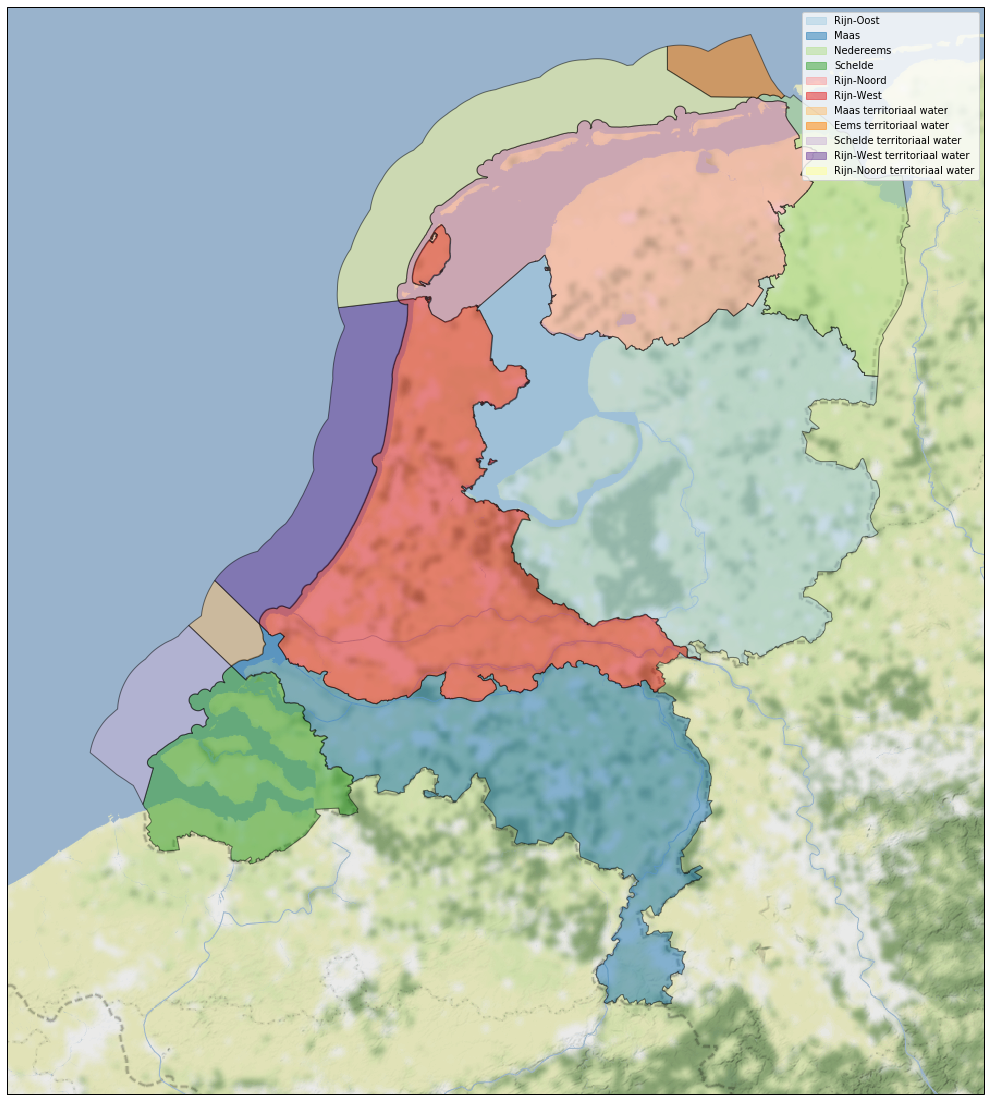

In [7]:
transects = reader.records()
transect = next(transects)

stamen_terrain = cimgt.Stamen('terrain-background')

ax = plt.axes(projection=stamen_terrain.crs)
ax.set_extent(extent, crs=ccrs.Geodetic())
ax.add_image(stamen_terrain, 8)

handles = []
for record, geoms, color in zip(reader.records(), reader.geometries(), cm.Paired(np.arange(0, 11))):
    name = record.attributes['NAMETEXT']
    ax.add_geometries([geoms], ccrs.epsg(28992), facecolors=color, edgecolor='black', alpha=0.5)
    handle = mpatches.Patch(color=color, alpha=0.5, label=name)
    handles.append(handle)
ax.legend(handles=handles)